In [1]:
import tensorflow as tf
import numpy as np
import pylab 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import time
tf.reset_default_graph()

In [4]:
def loadData():
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (x_test, y_test) = fashion_mnist.load_data()
    print(train_images.shape)
    x_train, x_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.1, random_state=1)

    #reshape the data
    x_train = x_train.reshape(x_train.shape[0], -1).astype('float32')
    x_valid = x_valid.reshape(x_valid.shape[0], -1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], -1).astype('float32')

    # Normalize
    x_train = x_train/255.0
    x_valid = x_valid/255.0
    x_test = x_test/255.0
    
    #Transpose of the matrix
    x_train = x_train.T
    x_valid = x_valid.T
    x_test = x_test.T

    # Convert labels to one-hot-encoded
    number_of_classes = 10
    y_train = tf.keras.utils.to_categorical(y_train, number_of_classes)
    y_valid = tf.keras.utils.to_categorical(y_valid, number_of_classes)
    y_test = tf.keras.utils.to_categorical(y_test, number_of_classes)
    print(y_train[0])
    print(y_train[1])
    
    # transpose the labels
    y_train = y_train.T
    y_valid = y_valid.T
    y_test = y_test.T

    print ("Reshaped Data: ")
    print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)
    #print (train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
    return x_train, y_train, x_valid, y_valid, x_test, y_test
    #(54000, 784) (54000, 10) (6000, 784) (6000, 10) (10000, 784) (10000, 10) 


In [5]:
x_train, y_train, x_valid, y_valid, x_test, y_test = loadData()

(60000, 28, 28)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Reshaped Data: 
(784, 54000) (10, 54000) (784, 6000) (10, 6000) (784, 10000) (10, 10000)


In [15]:
# Model building
def main(x_train, y_train, x_valid, y_valid, x_test, y_test):
    n_inputs = 784
    n_hidden_1 = 300
    n_hidden_2 = 100
    n_output = 10
    learningRate = 0.01
    n_epochs = 40
  
    # Placeholders for the traing and label data    
    x = tf.placeholder(tf.float32, [n_inputs, None], name='image')    
    y = tf.placeholder(tf.float32, [n_output, None], name='label')
   # tf.get_variable("W1", [n_hidden, n_inputs],initializer = tf.glorot_uniform_initializer(seed=1) )
    # Create weight and bias matrices (variables) for each layer of our network
    W1 = tf.Variable(tf.random_normal([n_hidden_1, n_inputs], mean=0.0, stddev= 0.9)) # 784 = 28 * 28
    b1 = tf.Variable(tf.zeros([n_hidden_1, 1]))

    W2 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1], mean=0.0, stddev= 0.05)) # 784 = 28 * 28
    b2 = tf.Variable(tf.zeros([n_hidden_2, 1]))

    W3 = tf.Variable(tf.random_normal([n_output, n_hidden_2], mean=0.0, stddev=0.005)) # 784 = 28 * 28
    b3 = tf.Variable(tf.zeros([n_output, 1]))
  
    # Push feature data through layers of NN
    layer_1  = tf.nn.relu(tf.add(tf.matmul(W1, x), b1))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(W2, layer_1), b2))
    layer_3 = tf.add(tf.matmul(W3, layer_2), b3)

    soft_max = tf.nn.softmax(layer_3)
  
    err = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=layer_3)
    loss = tf.reduce_mean(err)
    optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(soft_max), tf.argmax(y))

   # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    with tf.Session() as sess:
        train_loss_list = []
        val_loss_list = []
        epoch_list = []
        #epoch_list1 = []
        train_acc_list = []
        val_acc_list = []
        start_time = time.time()
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(n_epochs):
            _, train_loss, train_acc  = sess.run([optimizer, loss, accuracy], feed_dict={x: x_train, y: y_train})
            _, val_loss, val_acc  = sess.run([optimizer, loss, accuracy], feed_dict={x: x_valid, y: y_valid})

            train_loss_list.append(train_loss)
            epoch_list.append(epoch)
            train_acc_list.append(train_acc)
            ##-------------------------------
            val_loss_list.append(val_loss)
            #epoch_list.append(epoch)
            val_acc_list.append(val_acc) 
            
            print ("Epoch ", epoch, " Train Loss: ", train_loss, "  Train Acc: ", train_acc)
            print ("Epoch ", epoch, " Val Loss: ", val_loss, "  Val Acc: ", val_acc)

        duration = time.time() - start_time

        pylab.plot(epoch_list, val_loss_list, '-or', label = 'val_loss')
        pylab.plot(epoch_list, train_acc_list, '-ob', label = 'train_accuracy')
        pylab.plot(epoch_list, val_acc_list, '-ok', label = 'val_accuracy')
        pylab.plot(epoch_list, train_loss_list, 'purple', label = 'train_loss_list')
        pylab.legend(loc='bottom right')
        plt.xlabel('Epochs')
        pylab.show()
        print("Total time is: ", round(duration, 2), "seconds")
        print ("Final Validation Accuracy ", sess.run(accuracy, feed_dict={x: x_valid, y: y_valid}))
        print ("Final Test Accuracy ", sess.run(accuracy, feed_dict={x: x_test, y: y_test}))

Epoch  0  Train Loss:  0.67268467   Train Acc:  0.15083334
Epoch  0  Val Loss:  0.45752245   Val Acc:  0.18933333
Epoch  1  Train Loss:  0.3979095   Train Acc:  0.23522222
Epoch  1  Val Loss:  0.3722771   Val Acc:  0.267
Epoch  2  Train Loss:  0.3594725   Train Acc:  0.3125926
Epoch  2  Val Loss:  0.35152233   Val Acc:  0.33616668
Epoch  3  Train Loss:  0.34623393   Train Acc:  0.3726852
Epoch  3  Val Loss:  0.34246412   Val Acc:  0.39616665
Epoch  4  Train Loss:  0.339185   Train Acc:  0.41809258
Epoch  4  Val Loss:  0.33680707   Val Acc:  0.4365
Epoch  5  Train Loss:  0.334203   Train Acc:  0.45355555
Epoch  5  Val Loss:  0.33239314   Val Acc:  0.46633333
Epoch  6  Train Loss:  0.33005705   Train Acc:  0.48314816
Epoch  6  Val Loss:  0.32851973   Val Acc:  0.496
Epoch  7  Train Loss:  0.3263116   Train Acc:  0.508
Epoch  7  Val Loss:  0.32492644   Val Acc:  0.51816666
Epoch  8  Train Loss:  0.32279405   Train Acc:  0.52892596
Epoch  8  Val Loss:  0.32150677   Val Acc:  0.5391667
Epoc

/home/m/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


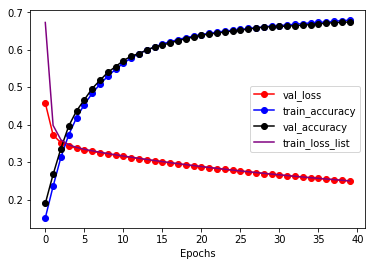

Total time is:  28.35 seconds
Final Validation Accuracy  0.6755
Final Test Accuracy  0.6767


In [16]:
main(x_train, y_train, x_valid, y_valid, x_test, y_test)

In [17]:
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)
x_train = x_train.T
y_train = y_train.T
x_valid = x_valid.T
y_valid = y_valid.T
x_test = x_test.T
y_test = y_test.T
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)
#print(len(x_train))

(784, 54000) (10, 54000) (784, 6000) (10, 6000) (784, 10000) (10, 10000)
(54000, 784) (54000, 10) (6000, 784) (6000, 10) (10000, 784) (10000, 10)


In [30]:
def getBatch(x, y, begin, end):
    x_miniBatch = x[begin:end]
    y_miniBatch = y[begin:end]
    return x_miniBatch, y_miniBatch

# Model building
def main(x_train, y_train, x_valid, y_valid, x_test, y_test, size):
    # Model Parameters
    n_inputs = 784
    n_hidden_1 = 300
    n_hidden_2 = 100
    n_output = 10
    learningRate = 0.01
    n_epochs = 40
    batchSize = size
    # Placeholders for the traing and label data    
    x = tf.placeholder(tf.float32, [n_inputs, None], name='image')    
    y = tf.placeholder(tf.float32, [n_output, None], name='label')
   # tf.get_variable("W1", [n_hidden, n_inputs],initializer = tf.glorot_uniform_initializer(seed=1) )
    # Create weight and bias matrices (variables) for each layer of our network
    W1 = tf.Variable(tf.random_normal([n_hidden_1, n_inputs], mean=0.0, stddev= 0.9)) # 784 = 28 * 28
    b1 = tf.Variable(tf.zeros([n_hidden_1, 1]))

    W2 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1], mean=0.0, stddev= 0.05)) # 784 = 28 * 28
    b2 = tf.Variable(tf.zeros([n_hidden_2, 1]))

    W3 = tf.Variable(tf.random_normal([n_output, n_hidden_2], mean=0.0, stddev=0.005)) # 784 = 28 * 28
    b3 = tf.Variable(tf.zeros([n_output, 1]))
  
    # Push feature data through layers of NN
    layer_1  = tf.nn.relu(tf.add(tf.matmul(W1, x), b1))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(W2, layer_1), b2))
    layer_3 = tf.add(tf.matmul(W3, layer_2), b3)

    soft_max = tf.nn.softmax(layer_3)
  
    err = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=layer_3)
    loss = tf.reduce_mean(err)
    optimizer = tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(soft_max), tf.argmax(y))

   # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    with tf.Session() as sess:
        loss_list = []
        epoch_list = []
        acc_list = []
        start_time = time.time()
        sess.run(tf.global_variables_initializer())
        iteration = int(len(x_train)/batchSize)
        for epoch in range(n_epochs):
            #print('Training epoch: {}'.format(epoch + 1))
            for i in range(iteration):
                begin = i * batchSize
                end = (i + 1) * batchSize
                x_short, y_short = getBatch(x_train, y_train, begin, end)
                x_short = x_short.T
                y_short = y_short.T
                feed_dict = {x: x_short, y:y_short}
                sess.run(optimizer, feed_dict=feed_dict)
                
                if i % 100 == 0:
                    loss_after_batch, acc_after_batch = sess.run([loss, accuracy],feed_dict=feed_dict)
                    #print('iter: ', i, 'Loss: ', loss_after_batch, 'Training Accuracy: ', acc_after_batch)
            
            feed_dict_test = {x: x_test.T, y: y_test.T}
            loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)
            #print('---------*************---------')
            #print("Test Loss: ", loss_test, "Test Accuracy: ", acc_test)
            return acc_test

In [35]:
main(x_train, y_train, x_valid, y_valid, x_test, y_test, 100)

0.7206

Text(0,0.5,'Accuracy')

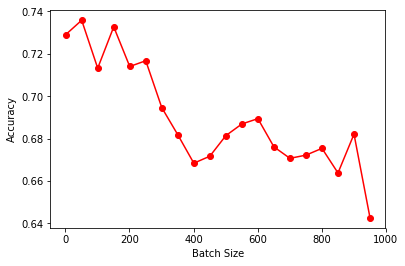

In [37]:
score_list = []
batch_try = []
for j in range(1, 1000, 50):
    score = main(x_train, y_train, x_valid, y_valid, x_test, y_test, j)
    score_list.append(score)
    batch_try.append(j)
pylab.plot(batch_try, score_list, '-or', label = 'diff_batch')    
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')